453.333333333
102.721088435


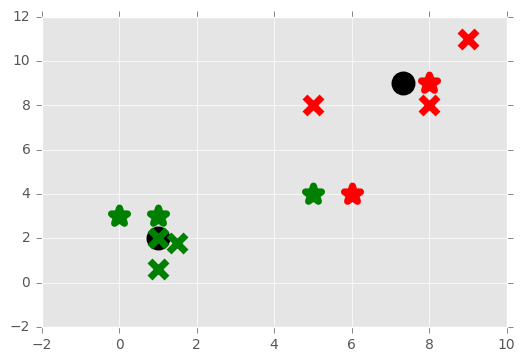

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

# try running on titanic dataset urself, use data manipulation code from other code u wrote
#from sklearn import preprocessing, cross_validation
#import pandas as pd

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],])

colors = 10*["g","r","c","b","k"]

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

class K_means:
    def __init__(self, k=2, tol = 0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i] # first 2 (k) centroids are i=0, and i=1 in the X (first 2 points)
        
        #number of iterations doing this for
        for i in range(self.max_iter):
            # empty classifications each iteration cuz need to keep updating
            self.classifications = {} # contain centroids and classifications
            
            for i in range(self.k):
                self.classifications[i] = [] #keys are centroids, values are featursets of that centroid
            
            # needs to be called data, not x in future
            for featureset in X:
                # list of distances from each centroid for each data point in X
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) # closest centroid is what u classify as
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classificaiton in self.classifications:
                # find average of all values of previous centroids classifications, make new centroid
                # basically redefine the centroud
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
            
            optimized = True
            
            #if any centroids in their movement, move more than theur tolerance (.001), not optimized
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid * 100.0) > self.tol: #self.tolerence
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0)) # see how much it moved
                    optimized = False
                    
            if optimized:
                break
            
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker ='o', color = 'k',s=150,linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

#plt.show()


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

# predictions, very easy once model is fit/trained
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)
plt.show()

